![](http://nci.org.au/wp-content/themes/nci/img/img-logo-large.png)

-------

# Using GSKY's WMS in Python
### Requesting map images through NCI's GSKY Data Server
NCI's GSKY Data Server supports the Open Geospatial Consortium (OGC) Web Map Service (WMS), which is a standard protocol for serving geospatial data as images (e.g., PNG).   


**The following libraries will need to be imported for this example:** 

In [1]:
from owslib.wms import WebMapService
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

**To start, we will need the base GSKY server URL:**

In [2]:
gsky_url = 'http://gsky.nci.org.au/ows'

**Using OWSLib, we can begin by inspecting the service metadata:**

In [3]:
wms = WebMapService(gsky_url, version='1.3.0')

**To find out the available data layers that can be requested:**

In [4]:
for layer in list(wms.contents):
    print("Layer Name:", wms[layer].name)
    print("Title:", wms[layer].title, '\n')

Layer Name: hltc:high:fc
Title: DEA High Tide Composite 25m v2.0 false colour 

Layer Name: hltc:high:tc
Title: DEA High Tide Composite 25m v2.0 true colour 

Layer Name: hltc:low:fc
Title: DEA Low Tide Composite 25m v2.0 false colour 

Layer Name: hltc:low:tc
Title: DEA Low Tide Composite 25m v2.0 true colour 

Layer Name: item:relative
Title: DEA Intertidal Extents Model Relative Layer 25m v2.0 

Layer Name: item:stddev
Title: DEA Intertidal Extents Model Confidence Layer 25m v2.0 

Layer Name: LS5:GEOMEDIAN:FALSE
Title: DEA Landsat 5 terrain corrected surface reflectance geometric median false colour 

Layer Name: LS5:GEOMEDIAN:TRUE
Title: DEA Landsat 5 terrain corrected surface reflectance geometric median true colour 

Layer Name: LS5:NBAR:FALSE
Title: 16-day DEA Landsat 5 surface reflectance false colour 

Layer Name: LS5:NBAR:FALSE:DAILY
Title: Daily DEA Landsat 5 surface reflectance false colour 

Layer Name: LS5:NBAR:TRUE
Title: 16-day DEA Landsat 5 surface reflectance true co

**We can also view metadata that is available about a selected layer. For example, you can view the abstract associated with that data layer.** 

In [5]:
layer = "LS8:GEOMEDIAN:TRUE"

In [6]:
print(wms[layer].abstract)

The terrain corrected surface reflectance geometric median (geomedian) is a pixel composite mosaic of a time series of earth observations. Essentially the value of a pixel in a geomedian image is the statistical median of all observations for that pixel from a period of time. For example the 2016 Landsat 8 geomedian image over an area will be the median of Landsat 8 pixels observed for that area in 2016. Multispectral satellite imagery, such as is available from Landsat and Sentinel-2, consists of multiple measurements per pixel: one for each spectral band. In order to create a meaningful median, a median pixel must take all concurrent spectral measurements into account simultaneously as a multi-dimensional set, rather than each measurement independently as occurs with a simple median. The geomedian is a high-dimensional statistic, which calculates a multi-dimensional median from all the spectral measurements from the satellite imagery at the same time, and maintains the relationships 

**Or view the CRS options, bounding box, and time positions available (these details will be needed to construct the GetMap request):** 

In [7]:
print("CRS Options: ")
crs = sorted(wms[layer].crsOptions)
print('\t', crs, '\n')
    
print("Bounding Box: ")
bbox = wms[layer].boundingBox
print('\t', bbox, '\n')
    
print("Time Positions: ")
time = wms[layer].timepositions
print('\t', time[:10], '\n')

CRS Options: 
	 ['CRS:84', 'EPSG:3857', 'EPSG:4326'] 

Bounding Box: 
	 (-180.0, -90.0, 180.0, 90.0, 'CRS:84') 

Time Positions: 
	 ['2013-01-01T00:00:00.000Z', '2014-01-01T00:00:00.000Z', '2015-01-01T00:00:00.000Z', '2016-01-01T00:00:00.000Z', '2017-01-01T00:00:00.000Z'] 



**Now let's use the information above to construct and make the GetMap request.**

**We'll need to define a bounding box for our request:**

In [8]:
subset_bbox = (148, -37, 151, -34)

**OWSLib's library can now be used to make the GetMap request:**

In [9]:
output = wms.getmap(layers=[layer],
                        srs=crs[2], 
                        bbox=(subset_bbox[0], subset_bbox[1], subset_bbox[2], subset_bbox[3]),
                        size=(256, 256), 
                        format='image/png',
                        time=time[2]
                        )

**To view the above constructed URL:**

In [10]:
print(output.geturl())

http://gsky.nci.org.au/ows?SERVICE=WMS&service=WMS&version=1.3.0&request=GetMap&layers=LS8%3AGEOMEDIAN%3ATRUE&styles=&width=256&height=256&crs=EPSG%3A4326&bbox=-37%2C148%2C-34%2C151&format=image%2Fpng&transparent=FALSE&bgcolor=0xFFFFFF&exceptions=XML&time=2015-01-01T00%3A00%3A00.000Z


**Lastly, we need to write the GetMap result to a file:**

In [11]:
pngfile = './output/gsky_getMap.png'
with open(pngfile, 'wb') as out:
    out.write(output.read())

**And if we'd like to confirm the result:**

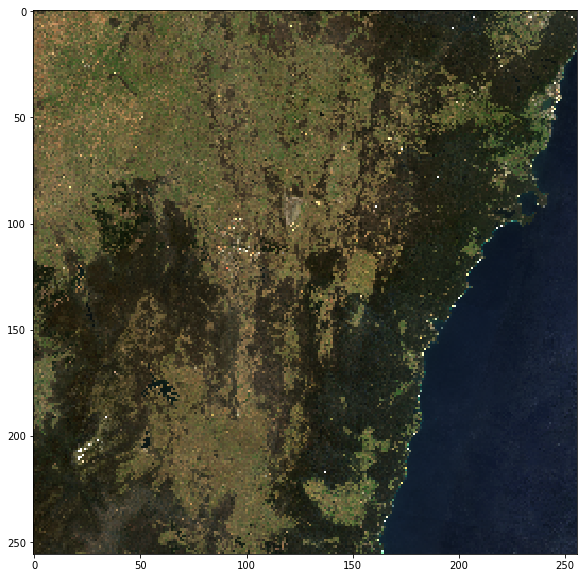

In [12]:
im = Image.open(pngfile)
plt.figure(figsize=(10, 10))
plt.imshow(im)

<br>
<br>
<br>


--------
**For more information on the OGC WMS standard specifications and the Python OWSLib package:** <br/>
http://www.opengeospatial.org/standards/wms <br/>
https://geopython.github.io/OWSLib/#wms <br/>
